In [13]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)
(256, 256)


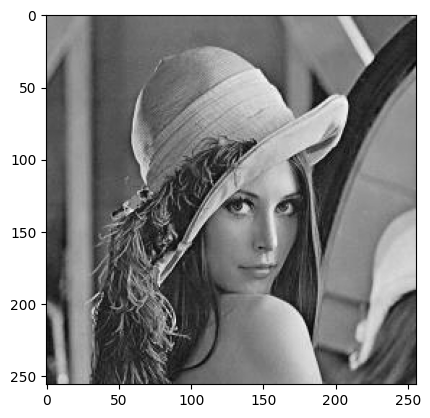

In [14]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/lena256.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [15]:
def saturation(value):
  if(value > 255):
    value = 255
  elif(value < 0):
    value = 0
  return value

In [16]:
kernel3 = np.ones((3,3), np.float32)/9

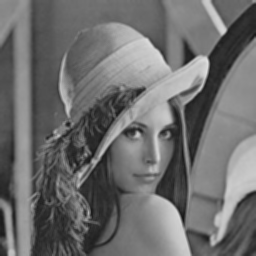

In [17]:
output = cv2.filter2D(gImg, -1, kernel3)
cv2_imshow(output)

In [18]:
gOut = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

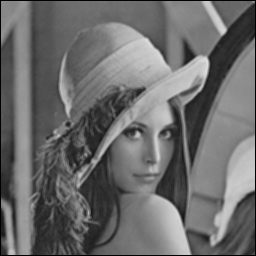

In [19]:
for h in range(1, gImg.shape[0]-1):
  for w in range(1, gImg.shape[1]-1):
    sum = 0
    for i in range(-1, 2):
      for j in range(-1, 2):
        sum += gImg[h+i, w+j] * kernel3[i+1, j+1]
    sum = saturation(sum)
    gOut[h,w] = sum

cv2_imshow(gOut)

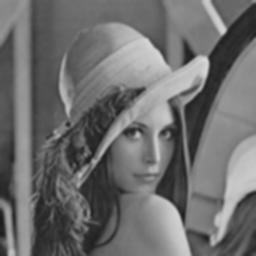

In [20]:
output = cv2.filter2D(output, -1, kernel3)
cv2_imshow(output)